In [1]:
import numpy as np
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

ERROR! Session/line number was not unique in database. History logging moved to new session 188


In [58]:
train_set = train_set.reindex_axis(['Cover_Type'] + list(train_set.columns[:-1]), axis=1)
train_set['Distance_To_Hydrology'] = np.sqrt(train_set.Vertical_Distance_To_Hydrology**2 
                                             + train_set.Horizontal_Distance_To_Hydrology**2)
train_set['Hillshade_Total'] = train_set.Hillshade_9am + train_set.Hillshade_Noon + train_set.Hillshade_3pm
train_set['Hillshade_Avg'] = (train_set.Hillshade_9am + train_set.Hillshade_Noon + train_set.Hillshade_3pm)/255

In [4]:
train_set.head()

Cover_Type  Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           5   1       2596      51      3                               258   
1           5   2       2590      56      2                               212   
2           2   3       2804     139      9                               268   
3           2   4       2785     155     18                               242   
4           5   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon      ...        Soil_Type34  Soil_Type35  \
0            221             232      ...                  0            0   
1            220             235      ...                  0            0   
2            234             238      ...                  0            0   
3            238             238      ...                  0            0   
4            220             234      ...                  0            0   

   Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Distance_To_Hydrology  Hillshade_Total  Hillshade_Avg  
0             258.000000              601       2.356863  
1             212.084889              606       2.376471  
2             275.769832              607       2.380392  
3             269.235956              598       2.345098  
4             153.003268              604       2.368627  

[5 rows x 59 columns]

In [5]:
spruce = train_set[train_set.Cover_Type == 1]
lodgepoll = train_set[train_set.Cover_Type == 2]
ponderosa = train_set[train_set.Cover_Type == 3]
cottonwood = train_set[train_set.Cover_Type == 4]
aspen = train_set[train_set.Cover_Type == 5]
douglas = train_set[train_set.Cover_Type == 6]
krummholz = train_set[train_set.Cover_Type == 7]

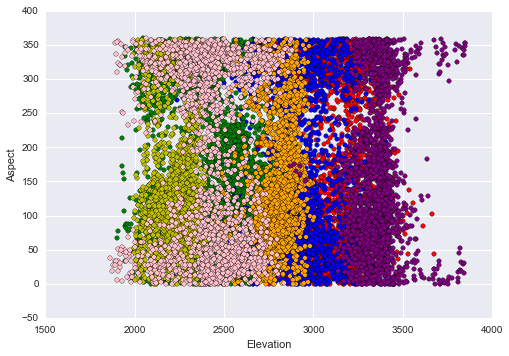

In [6]:
plt.scatter(spruce.Elevation, spruce.Aspect, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Aspect, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Aspect, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Aspect, c = 'y')
plt.scatter(aspen.Elevation, aspen.Aspect, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Aspect, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Aspect, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Aspect')

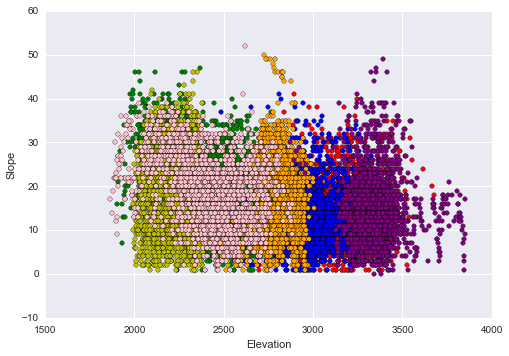

In [7]:
plt.scatter(spruce.Elevation, spruce.Slope, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Slope, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Slope, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Slope, c = 'y')
plt.scatter(aspen.Elevation, aspen.Slope, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Slope, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Slope, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Slope')

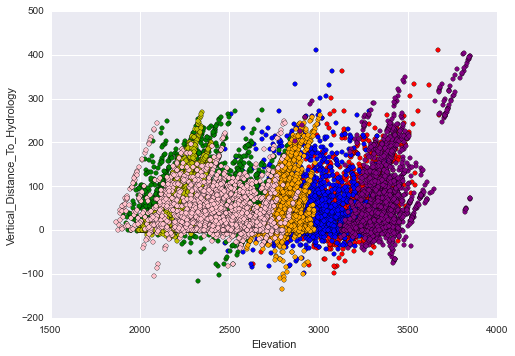

In [8]:
plt.scatter(spruce.Elevation, spruce.Vertical_Distance_To_Hydrology, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Vertical_Distance_To_Hydrology, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Vertical_Distance_To_Hydrology, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Vertical_Distance_To_Hydrology, c = 'y')
plt.scatter(aspen.Elevation, aspen.Vertical_Distance_To_Hydrology, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Vertical_Distance_To_Hydrology, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Vertical_Distance_To_Hydrology, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Vertical_Distance_To_Hydrology')

In [9]:
train_set.describe()

Cover_Type           Id     Elevation        Aspect         Slope  \
count  15120.000000  15120.00000  15120.000000  15120.000000  15120.000000   
mean       4.000000   7560.50000   2749.322553    156.676653     16.501587   
std        2.000066   4364.91237    417.678187    110.085801      8.453927   
min        1.000000      1.00000   1863.000000      0.000000      0.000000   
25%        2.000000   3780.75000   2376.000000     65.000000     10.000000   
50%        4.000000   7560.50000   2752.000000    126.000000     15.000000   
75%        6.000000  11340.25000   3104.000000    261.000000     22.000000   
max        7.000000  15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

           ...         Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37  \
count      ...        15120.000000  15120.000000  15120.000000  15120.000000   
mean       ...            0.001455      0.006746      0.000661      0.002249   
std        ...            0.038118      0.081859      0.025710      0.047368   
min        ...            0.000000      0.000000      0.000000      0.000000   
25%        ...            0.000000      0.000000      0.000000      0.000000   
50%        ...            0.000000      0.000000      0.000000      0.000000   
75%        ...            0.000000      0.000000      0.000000      0.000000   
max        ...            1.000000      1.000000      1.000000      1.000000   

        Soil_Type38   Soil_Type39   Soil_Type40  Distance_To_Hydrology  \
count  15120.000000  15120.000000  15120.000000           15120.000000   
mean       0.048148      0.043452      0.030357             235.948778   
std        0.214086      0.203880      0.171574             215.491695   
min        0.000000      0.000000      0.000000               0.000000   
25%        0.000000      0.000000      0.000000              67.186308   
50%        0.000000      0.000000      0.000000             188.480768   
75%        0.000000      0.000000      0.000000             342.069071   
max        1.000000      1.000000      1.000000            1356.939571   

       Hillshade_Total  Hillshade_Avg  
count     15120.000000   15120.000000  
mean        566.761905       2.222596  
std          51.375104       0.201471  
min         317.000000       1.243137  
25%         541.000000       2.121569  
50%         577.000000       2.262745  
75%         604.000000       2.368627  
max         641.000000       2.513725  

[8 rows x 59 columns]

In [10]:
train_set.columns

Index(['Cover_Type', 'Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Distance_To_Hydrology', 'Hillshade_Total', 'Hillshade_Avg'], dtype='object

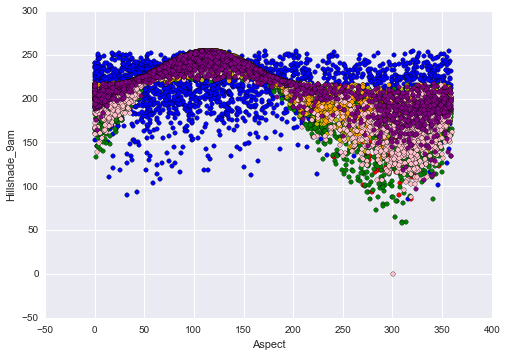

In [11]:
plt.scatter(spruce.Aspect, spruce.Hillshade_9am, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_9am, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_9am, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_9am, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_9am, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_9am, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_9am, c = 'purple')
plt.xlabel('Aspect')
plt.ylabel('Hillshade_9am')

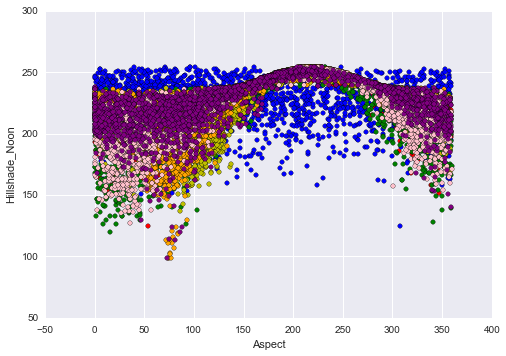

In [12]:
plt.scatter(spruce.Aspect, spruce.Hillshade_Noon, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_Noon, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_Noon, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_Noon, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_Noon, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_Noon, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_Noon, c = 'purple')
plt.xlabel('Aspect')
plt.ylabel('Hillshade_Noon')

In [13]:
train_set.columns

Index(['Cover_Type', 'Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Distance_To_Hydrology', 'Hillshade_Total', 'Hillshade_Avg'], dtype='object

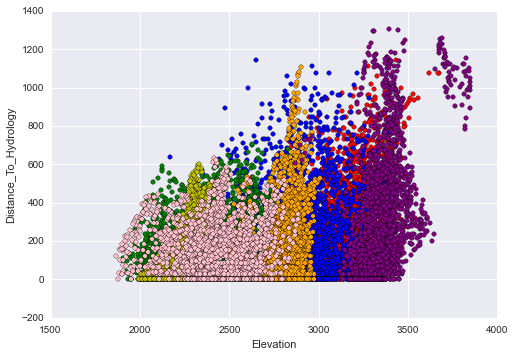

In [14]:
plt.scatter(spruce.Elevation, spruce.Distance_To_Hydrology, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Distance_To_Hydrology, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Distance_To_Hydrology, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Distance_To_Hydrology, c = 'y')
plt.scatter(aspen.Elevation, aspen.Distance_To_Hydrology, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Distance_To_Hydrology, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Distance_To_Hydrology, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Distance_To_Hydrology')

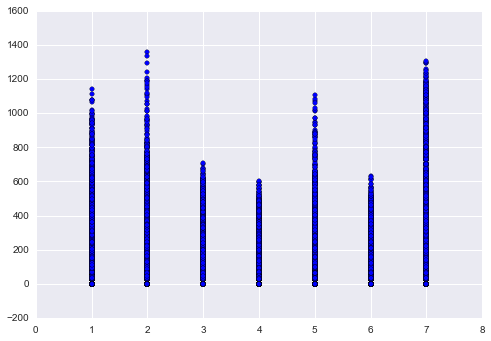

In [15]:
plt.scatter(train_set.Cover_Type, train_set.Distance_To_Hydrology)

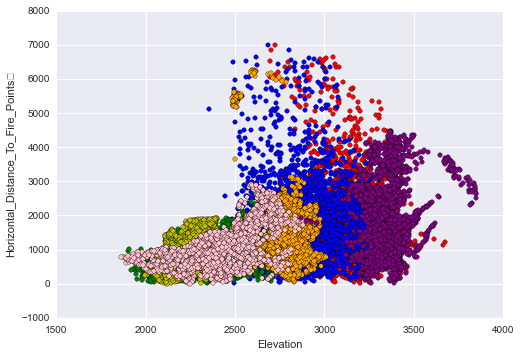

In [16]:
plt.scatter(spruce.Elevation, spruce.Horizontal_Distance_To_Fire_Points	, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Horizontal_Distance_To_Fire_Points	, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Horizontal_Distance_To_Fire_Points	, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Horizontal_Distance_To_Fire_Points	, c = 'y')
plt.scatter(aspen.Elevation, aspen.Horizontal_Distance_To_Fire_Points	, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Horizontal_Distance_To_Fire_Points	, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Horizontal_Distance_To_Fire_Points	, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Fire_Points	')

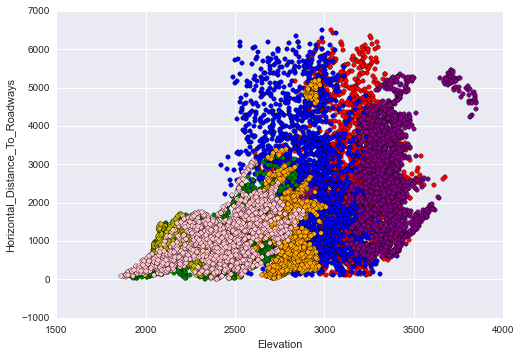

In [17]:
plt.scatter(spruce.Elevation, spruce.Horizontal_Distance_To_Roadways, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Horizontal_Distance_To_Roadways, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Horizontal_Distance_To_Roadways, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Horizontal_Distance_To_Roadways, c = 'y')
plt.scatter(aspen.Elevation, aspen.Horizontal_Distance_To_Roadways, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Horizontal_Distance_To_Roadways, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Horizontal_Distance_To_Roadways, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Roadways')

In [18]:
train_set.describe()

Cover_Type           Id     Elevation        Aspect         Slope  \
count  15120.000000  15120.00000  15120.000000  15120.000000  15120.000000   
mean       4.000000   7560.50000   2749.322553    156.676653     16.501587   
std        2.000066   4364.91237    417.678187    110.085801      8.453927   
min        1.000000      1.00000   1863.000000      0.000000      0.000000   
25%        2.000000   3780.75000   2376.000000     65.000000     10.000000   
50%        4.000000   7560.50000   2752.000000    126.000000     15.000000   
75%        6.000000  11340.25000   3104.000000    261.000000     22.000000   
max        7.000000  15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

           ...         Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37  \
count      ...        15120.000000  15120.000000  15120.000000  15120.000000   
mean       ...            0.001455      0.006746      0.000661      0.002249   
std        ...            0.038118      0.081859      0.025710      0.047368   
min        ...            0.000000      0.000000      0.000000      0.000000   
25%        ...            0.000000      0.000000      0.000000      0.000000   
50%        ...            0.000000      0.000000      0.000000      0.000000   
75%        ...            0.000000      0.000000      0.000000      0.000000   
max        ...            1.000000      1.000000      1.000000      1.000000   

        Soil_Type38   Soil_Type39   Soil_Type40  Distance_To_Hydrology  \
count  15120.000000  15120.000000  15120.000000           15120.000000   
mean       0.048148      0.043452      0.030357             235.948778   
std        0.214086      0.203880      0.171574             215.491695   
min        0.000000      0.000000      0.000000               0.000000   
25%        0.000000      0.000000      0.000000              67.186308   
50%        0.000000      0.000000      0.000000             188.480768   
75%        0.000000      0.000000      0.000000             342.069071   
max        1.000000      1.000000      1.000000            1356.939571   

       Hillshade_Total  Hillshade_Avg  
count     15120.000000   15120.000000  
mean        566.761905       2.222596  
std          51.375104       0.201471  
min         317.000000       1.243137  
25%         541.000000       2.121569  
50%         577.000000       2.262745  
75%         604.000000       2.368627  
max         641.000000       2.513725  

[8 rows x 59 columns]

In [19]:
train_set[train_set.Hillshade_3pm == 0].describe()

Cover_Type            Id    Elevation      Aspect      Slope  \
count   88.000000     88.000000    88.000000   88.000000  88.000000   
mean     4.590909   5691.977273  2604.579545   89.556818  37.715909   
std      1.528551   4499.066792   496.822009   20.328259   7.772555   
min      1.000000   1376.000000  1931.000000   47.000000   7.000000   
25%      4.000000   2249.500000  2137.000000   78.000000  33.750000   
50%      4.000000   3147.500000  2718.500000   88.000000  38.000000   
75%      5.000000   8443.500000  2913.750000   99.250000  44.000000   
max      7.000000  14946.000000  3472.000000  214.000000  50.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                         88.000000                       88.000000   
mean                         163.000000                       77.261364   
std                          111.354874                       60.419509   
min                            0.000000                      -26.000000   
25%                           90.000000                       23.750000   
50%                          142.000000                       72.000000   
75%                          228.000000                      119.500000   
max                          524.000000                      230.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                        88.000000      88.000000       88.000000   
mean                       1015.011364     239.818182      151.954545   
std                        1083.948481      11.848222       28.576942   
min                          30.000000     203.000000       99.000000   
25%                         265.000000     231.000000      125.750000   
50%                         530.500000     243.500000      157.500000   
75%                        1579.750000     250.000000      172.000000   
max                        4094.000000     254.000000      247.000000   

           ...        Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
count      ...                 88           88           88    88.000000   
mean       ...                  0            0            0     0.011364   
std        ...                  0            0            0     0.106600   
min        ...                  0            0            0     0.000000   
25%        ...                  0            0            0     0.000000   
50%        ...                  0            0            0     0.000000   
75%        ...                  0            0            0     0.000000   
max        ...                  0            0            0     1.000000   

       Soil_Type38  Soil_Type39  Soil_Type40  Distance_To_Hydrology  \
count           88    88.000000    88.000000              88.000000   
mean             0     0.147727     0.011364             184.123641   
std              0     0.356863     0.106600             121.126212   
min              0     0.000000     0.000000               0.000000   
25%              0     0.000000     0.000000             102.190960   
50%              0     0.000000     0.000000             163.877887   
75%              0     0.000000     0.000000             255.899664   
max              0     1.000000     1.000000             550.886558   

       Hillshade_Total  Hillshade_Avg  
count        88.000000      88.000000  
mean        391.772727       1.536364  
std          37.048501       0.145288  
min         317.000000       1.243137  
25%         360.250000       1.412745  
50%         405.500000       1.590196  
75%         419.000000       1.643137  
max         460.000000       1.803922  

[8 rows x 59 columns]

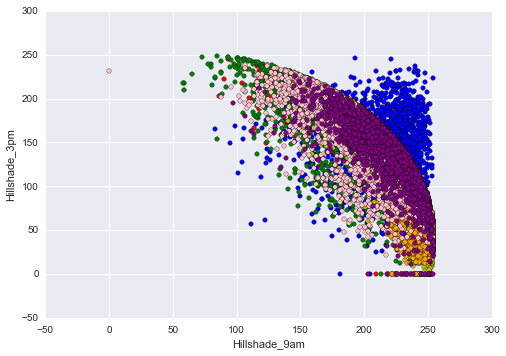

In [20]:
plt.scatter(spruce.Hillshade_9am, spruce.Hillshade_3pm, c = 'r')
plt.scatter(lodgepoll.Hillshade_9am, spruce.Hillshade_3pm, c = 'b')
plt.scatter(ponderosa.Hillshade_9am, ponderosa.Hillshade_3pm, c = 'g')
plt.scatter(cottonwood.Hillshade_9am, cottonwood.Hillshade_3pm, c = 'y')
plt.scatter(aspen.Hillshade_9am, aspen.Hillshade_3pm, c = 'orange')
plt.scatter(douglas.Hillshade_9am, douglas.Hillshade_3pm, c = 'pink')
plt.scatter(krummholz.Hillshade_9am, krummholz.Hillshade_3pm, c = 'purple')
plt.xlabel('Hillshade_9am')
plt.ylabel('Hillshade_3pm')

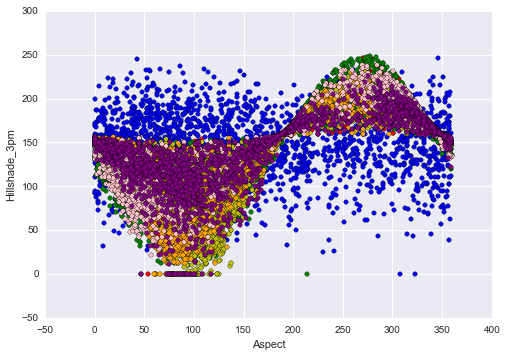

In [21]:
plt.scatter(spruce.Aspect, spruce.Hillshade_3pm, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_3pm, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_3pm, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_3pm, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_3pm, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_3pm, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_3pm, c = 'purple')
plt.xlabel('Aspect')
plt.ylabel('Hillshade_3pm')

In [22]:
train_set.Slope.describe()

count    15120.000000
mean        16.501587
std          8.453927
min          0.000000
25%         10.000000
50%         15.000000
75%         22.000000
max         52.000000
Name: Slope, dtype: float64

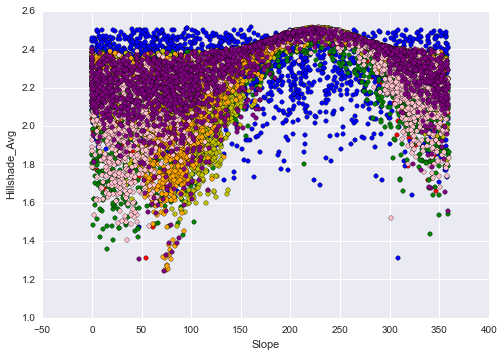

In [23]:
plt.scatter(spruce.Aspect, spruce.Hillshade_Avg, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_Avg, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_Avg, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_Avg, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_Avg, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_Avg, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_Avg, c = 'purple')
plt.xlabel('Slope')
plt.ylabel('Hillshade_Avg')

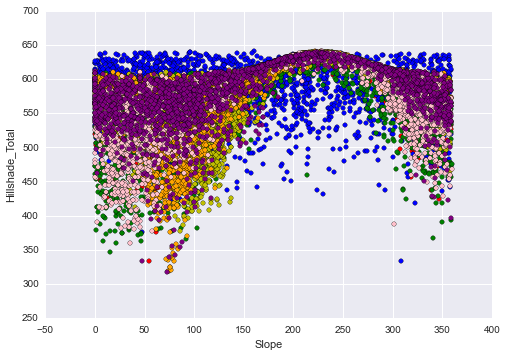

In [24]:
plt.scatter(spruce.Aspect, spruce.Hillshade_Total, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_Total, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_Total, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_Total, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_Total, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_Total, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_Total, c = 'purple')
plt.xlabel('Slope')
plt.ylabel('Hillshade_Total')

In [25]:
train_set.Cover_Type.describe()

count    15120.000000
mean         4.000000
std          2.000066
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

In [26]:
train_set.cov()

Cover_Type               Id  \
Cover_Type                            4.000265       946.024936   
Id                                  946.024936  19052460.000000   
Elevation                            13.441365    338182.869270   
Aspect                                1.764733      8505.845327   
Slope                                 1.483233      -744.212448   
Horizontal_Distance_To_Hydrology     -4.418149     91363.066241   
Vertical_Distance_To_Hydrology        9.265428     14794.668794   
Horizontal_Distance_To_Roadways    -280.028176   -191028.240724   
Hillshade_9am                        -0.628745       104.884086   
Hillshade_Noon                       -4.510616      7277.825055   
Hillshade_3pm                        -4.901647      8518.804716   
Horizontal_Distance_To_Fire_Points -196.650771   -330023.095542   
Wilderness_Area1                     -0.195979      -631.672300   
Wilderness_Area2                      0.005357       123.583670   
Wilderness_Area3                      0.120577       827.740691   
Wilderness_Area4                      0.070044      -319.652060   
Soil_Type1                            0.004564       -38.633210   
Soil_Type2                            0.008995        39.515213   
Soil_Type3                           -0.008003       -48.750843   
Soil_Type4                           -0.012765       118.396819   
Soil_Type5                            0.005754       -18.916628   
Soil_Type6                            0.002646       -40.742179   
Soil_Type7                            0.000000         0.000000   
Soil_Type8                           -0.000132        -0.467127   
Soil_Type9                           -0.001389        -1.595674   
Soil_Type10                           0.089953        49.152523   
Soil_Type11                           0.003307        44.716450   
Soil_Type12                          -0.031616       -68.968880   
Soil_Type13                           0.014154        11.543356   
Soil_Type14                           0.004630        -7.358059   
Soil_Type15                           0.000000         0.000000   
Soil_Type16                           0.001521        -1.432701   
Soil_Type17                           0.016734        -2.529400   
Soil_Type18                           0.000794       -19.278921   
Soil_Type19                          -0.003506        -7.141411   
Soil_Type20                          -0.010120       -28.968748   
Soil_Type21                          -0.001587         2.091077   
Soil_Type22                          -0.058536        23.294828   
Soil_Type23                          -0.069251       -16.584199   
Soil_Type24                          -0.026060        19.194358   
Soil_Type25                          -0.000132         0.201435   
Soil_Type26                          -0.002050         8.118063   
Soil_Type27                          -0.001455         3.317448   
Soil_Type28                          -0.000595        -0.543389   
Soil_Type29                          -0.122164      -282.730042   
Soil_Type30                           0.000595      -146.904855   
Soil_Type31                          -0.023414        16.520603   
Soil_Type32                          -0.055229        61.988161   
Soil_Type33                          -0.031219        57.718368   
Soil_Type34                          -0.000265         3.746875   
Soil_Type35                           0.018718        20.537999   
Soil_Type36                           0.001323         1.022290   
Soil_Type37                           0.006746         3.316357   
Soil_Type38                           0.110391        81.234804   
Soil_Type39                           0.098022        74.197467   
Soil_Type40                           0.070640        91.721774   
Distance_To_Hydrology                -2.383582     91931.886767   
Hillshade_Total                     -10.041008     15901.513857   
Hillshade_Avg                        -0.039377        62.358878   

               

In [27]:
train_set.describe()

Cover_Type           Id     Elevation        Aspect         Slope  \
count  15120.000000  15120.00000  15120.000000  15120.000000  15120.000000   
mean       4.000000   7560.50000   2749.322553    156.676653     16.501587   
std        2.000066   4364.91237    417.678187    110.085801      8.453927   
min        1.000000      1.00000   1863.000000      0.000000      0.000000   
25%        2.000000   3780.75000   2376.000000     65.000000     10.000000   
50%        4.000000   7560.50000   2752.000000    126.000000     15.000000   
75%        6.000000  11340.25000   3104.000000    261.000000     22.000000   
max        7.000000  15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

           ...         Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37  \
count      ...        15120.000000  15120.000000  15120.000000  15120.000000   
mean       ...            0.001455      0.006746      0.000661      0.002249   
std        ...            0.038118      0.081859      0.025710      0.047368   
min        ...            0.000000      0.000000      0.000000      0.000000   
25%        ...            0.000000      0.000000      0.000000      0.000000   
50%        ...            0.000000      0.000000      0.000000      0.000000   
75%        ...            0.000000      0.000000      0.000000      0.000000   
max        ...            1.000000      1.000000      1.000000      1.000000   

        Soil_Type38   Soil_Type39   Soil_Type40  Distance_To_Hydrology  \
count  15120.000000  15120.000000  15120.000000           15120.000000   
mean       0.048148      0.043452      0.030357             235.948778   
std        0.214086      0.203880      0.171574             215.491695   
min        0.000000      0.000000      0.000000               0.000000   
25%        0.000000      0.000000      0.000000              67.186308   
50%        0.000000      0.000000      0.000000             188.480768   
75%        0.000000      0.000000      0.000000             342.069071   
max        1.000000      1.000000      1.000000            1356.939571   

       Hillshade_Total  Hillshade_Avg  
count     15120.000000   15120.000000  
mean        566.761905       2.222596  
std          51.375104       0.201471  
min         317.000000       1.243137  
25%         541.000000       2.121569  
50%         577.000000       2.262745  
75%         604.000000       2.368627  
max         641.000000       2.513725  

[8 rows x 59 columns]

In [28]:
tdrop = train_set.dropna()
tdrop.describe()

Cover_Type           Id     Elevation        Aspect         Slope  \
count  15120.000000  15120.00000  15120.000000  15120.000000  15120.000000   
mean       4.000000   7560.50000   2749.322553    156.676653     16.501587   
std        2.000066   4364.91237    417.678187    110.085801      8.453927   
min        1.000000      1.00000   1863.000000      0.000000      0.000000   
25%        2.000000   3780.75000   2376.000000     65.000000     10.000000   
50%        4.000000   7560.50000   2752.000000    126.000000     15.000000   
75%        6.000000  11340.25000   3104.000000    261.000000     22.000000   
max        7.000000  15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

           ...         Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37  \
count      ...        15120.000000  15120.000000  15120.000000  15120.000000   
mean       ...            0.001455      0.006746      0.000661      0.002249   
std        ...            0.038118      0.081859      0.025710      0.047368   
min        ...            0.000000      0.000000      0.000000      0.000000   
25%        ...            0.000000      0.000000      0.000000      0.000000   
50%        ...            0.000000      0.000000      0.000000      0.000000   
75%        ...            0.000000      0.000000      0.000000      0.000000   
max        ...            1.000000      1.000000      1.000000      1.000000   

        Soil_Type38   Soil_Type39   Soil_Type40  Distance_To_Hydrology  \
count  15120.000000  15120.000000  15120.000000           15120.000000   
mean       0.048148      0.043452      0.030357             235.948778   
std        0.214086      0.203880      0.171574             215.491695   
min        0.000000      0.000000      0.000000               0.000000   
25%        0.000000      0.000000      0.000000              67.186308   
50%        0.000000      0.000000      0.000000             188.480768   
75%        0.000000      0.000000      0.000000             342.069071   
max        1.000000      1.000000      1.000000            1356.939571   

       Hillshade_Total  Hillshade_Avg  
count     15120.000000   15120.000000  
mean        566.761905       2.222596  
std          51.375104       0.201471  
min         317.000000       1.243137  
25%         541.000000       2.121569  
50%         577.000000       2.262745  
75%         604.000000       2.368627  
max         641.000000       2.513725  

[8 rows x 59 columns]

In [59]:
plot_features = ['Cover_Type', 'Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                 'Horizontal_Distance_To_Fire_Points','Distance_To_Hydrology', 
                 'Hillshade_Total', 'Hillshade_Avg']
df_to_plot = train_set[plot_features]
df2 = train_set.drop(['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                 'Horizontal_Distance_To_Fire_Points','Distance_To_Hydrology', 
                 'Hillshade_Total', 'Hillshade_Avg'], axis = 1)
df2.describe()

Cover_Type           Id  Horizontal_Distance_To_Hydrology  \
count  15120.000000  15120.00000                      15120.000000   
mean       4.000000   7560.50000                        227.195701   
std        2.000066   4364.91237                        210.075296   
min        1.000000      1.00000                          0.000000   
25%        2.000000   3780.75000                         67.000000   
50%        4.000000   7560.50000                        180.000000   
75%        6.000000  11340.25000                        330.000000   
max        7.000000  15120.00000                       1343.000000   

       Vertical_Distance_To_Hydrology  Wilderness_Area1  Wilderness_Area2  \
count                    15120.000000      15120.000000      15120.000000   
mean                        51.076521          0.237897          0.033003   
std                         61.239406          0.425810          0.178649   
min                       -146.000000          0.000000          0.000000   
25%                          5.000000          0.000000          0.000000   
50%                         32.000000          0.000000          0.000000   
75%                         79.000000          0.000000          0.000000   
max                        554.000000          1.000000          1.000000   

       Wilderness_Area3  Wilderness_Area4    Soil_Type1    Soil_Type2  \
count      15120.000000      15120.000000  15120.000000  15120.000000   
mean           0.419907          0.309193      0.023479      0.041204   
std            0.493560          0.462176      0.151424      0.198768   
min            0.000000          0.000000      0.000000      0.000000   
25%            0.000000          0.000000      0.000000      0.000000   
50%            0.000000          0.000000      0.000000      0.000000   
75%            1.000000          1.000000      0.000000      0.000000   
max            1.000000          1.000000      1.000000      1.000000   

           ...        Soil_Type31   Soil_Type32   Soil_Type33   Soil_Type34  \
count      ...       15120.000000  15120.000000  15120.000000  15120.000000   
mean       ...           0.021958      0.045635      0.040741      0.001455   
std        ...           0.146550      0.208699      0.197696      0.038118   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40  
count  15120.000000  
mean       0.030357  
std        0.171574  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 48 columns]

In [51]:
df_to_plot.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4])

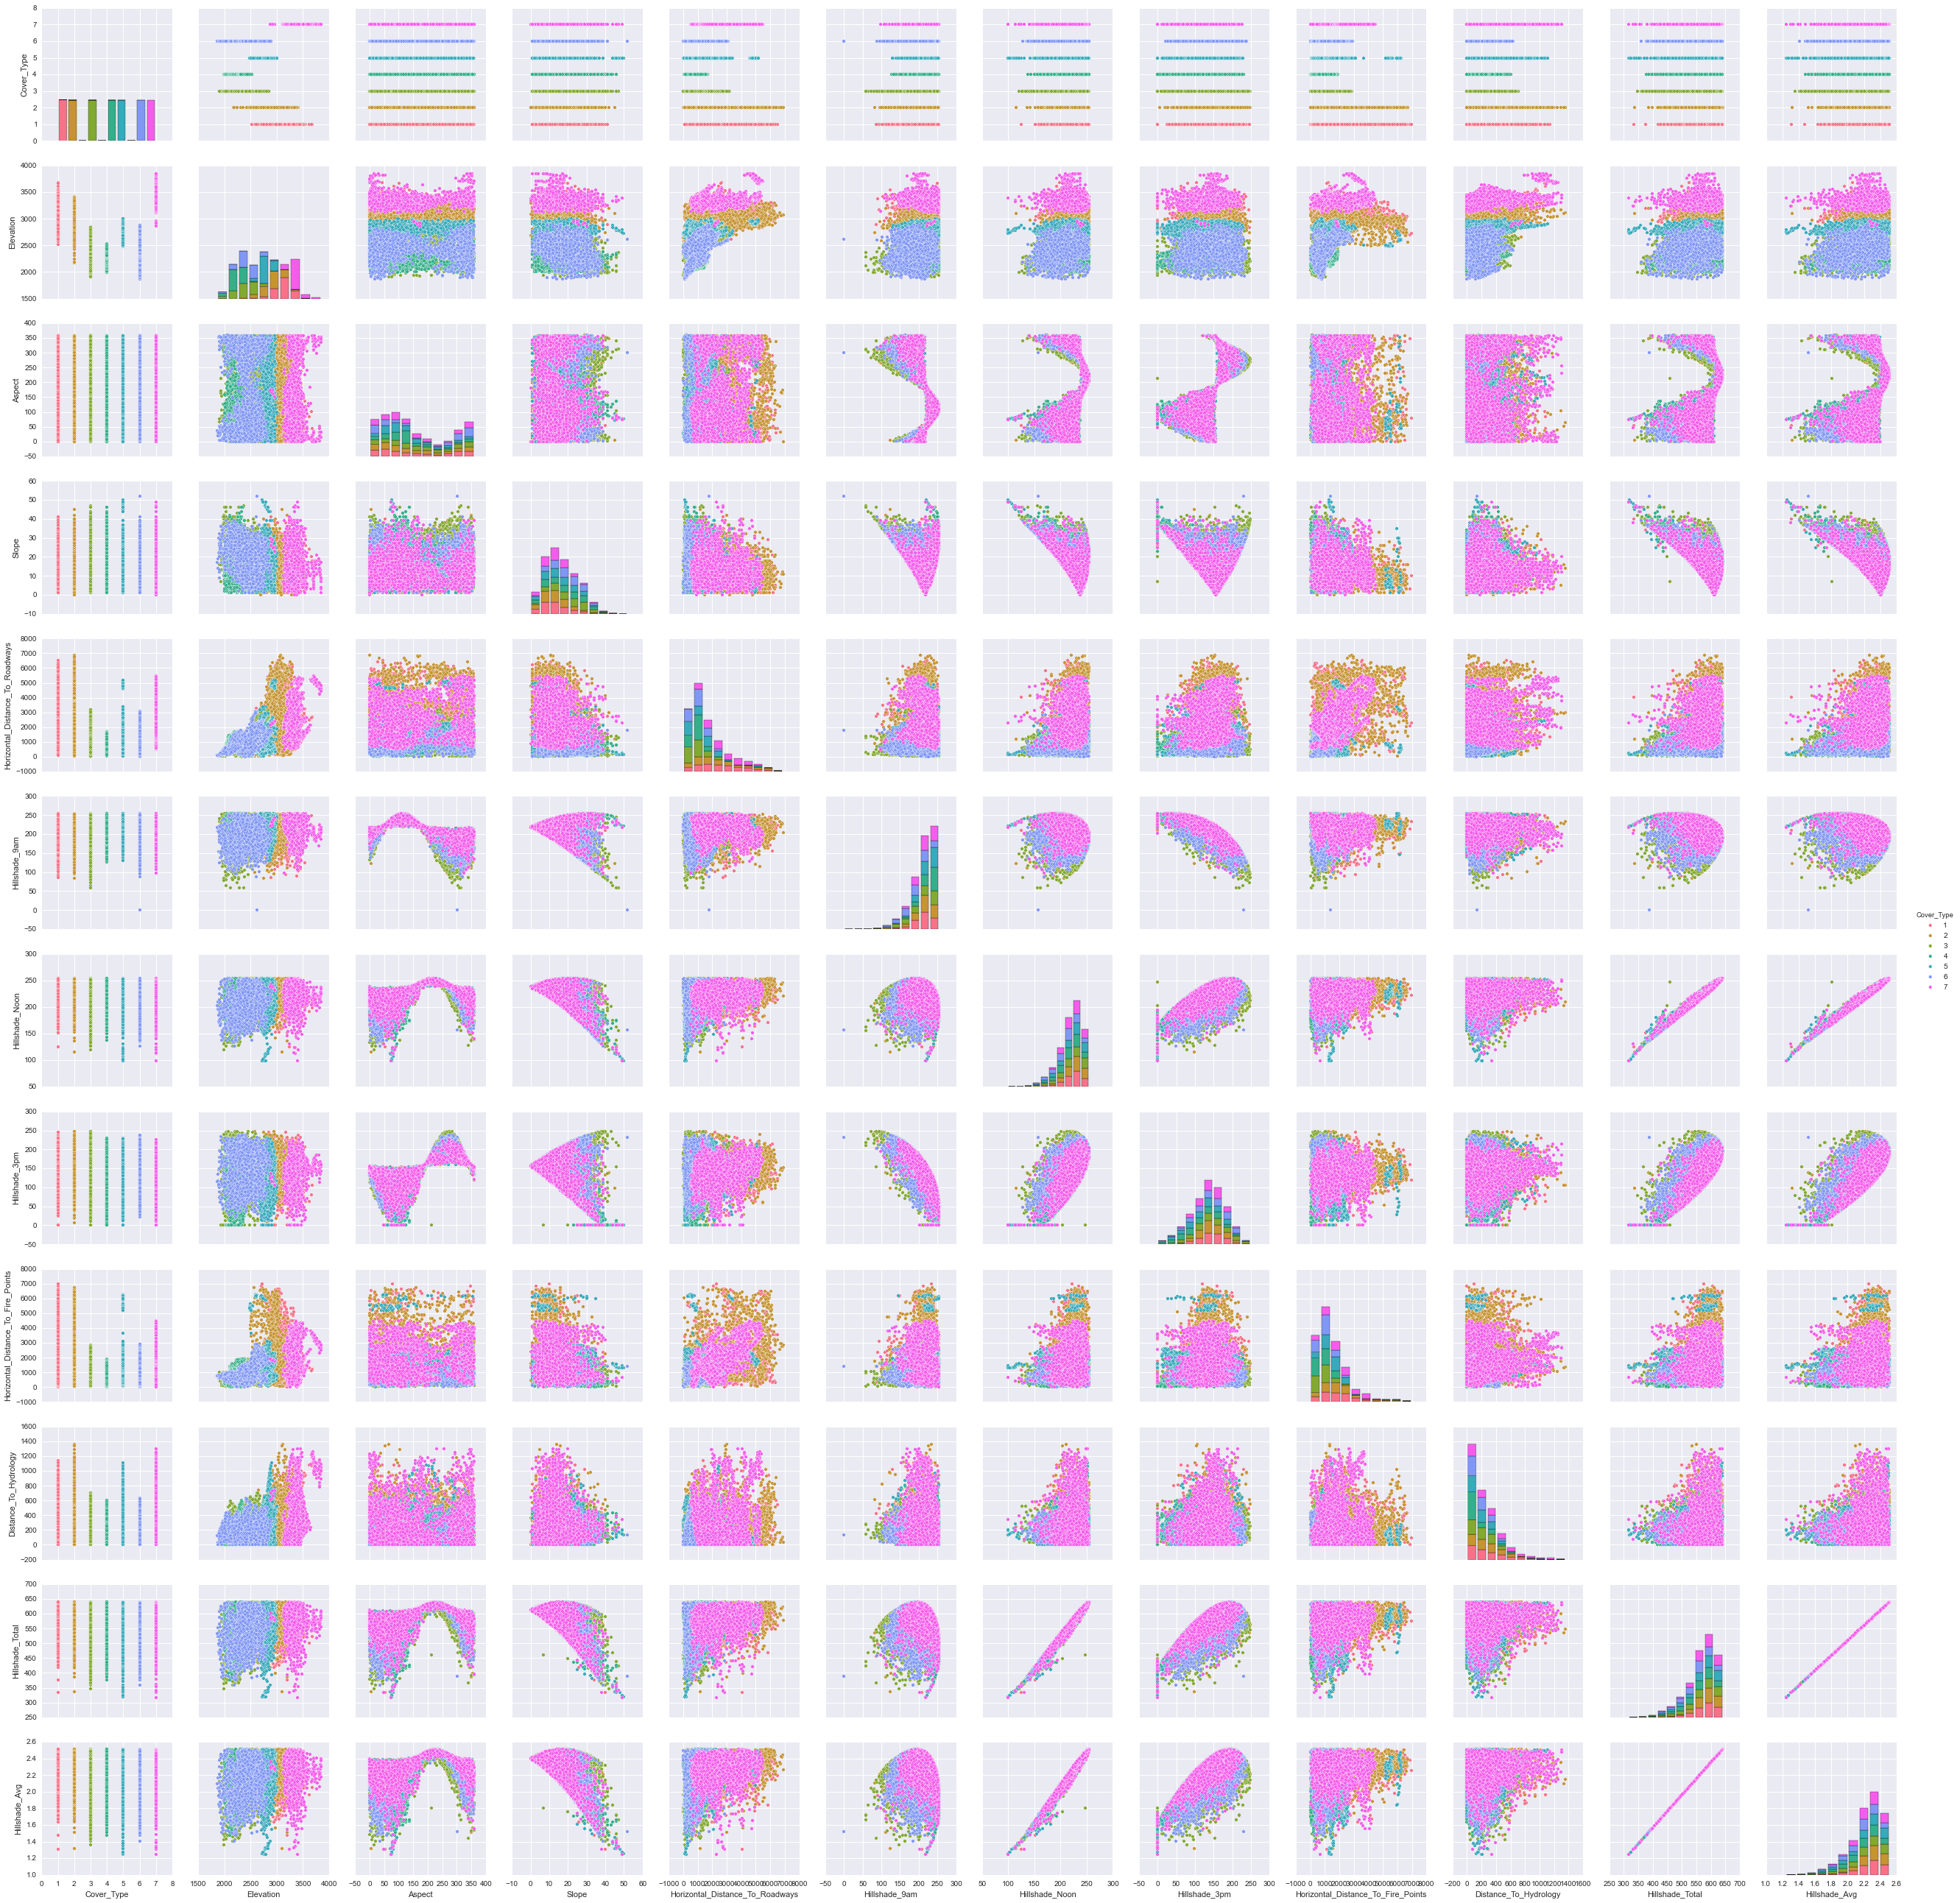

In [52]:
sns.pairplot(df_to_plot, hue="Cover_Type")

In [ ]:
sns.pairplot(df2, hue="Cover_Type")